# Explanatory Data Analysis for Charles Christensen on King County Housing Data 

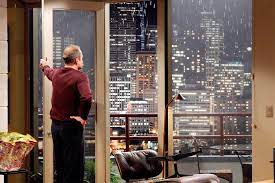

## Introduction

### The project
This project is about Explanatory Data Analysis (EDA) techniques and presentation of results to a client. This is my very first data analysis I do on my own. Please do not be too hard on me and take the informations on this notebook with a grain of salt. I am open for improvements and looking forward to constructive criticism.

### The Data
For the project I used the **King County Housing Data**. This dataset contains information about home sales in King County (USA).  
I found the data in the eda schema of Spiced database. It contained two tables:
- king_county_house_sales
- king_county_house_details.

I accessed it via DBeaver and exported them as a cvs file.

### The client

The client is Charles Christensen. He is a **Seller**. His Characteristics are:
- Invest with big returns
- wondering about renovation?
- which Neighborhood?
- Timing?

### The Tasks
The Tasks are:
1. Create a new repo using this [template](hhttps://github.com/neuefische/ds-eda-project-template).

2. Through EDA/statistical analysis above please come up with AT LEAST 3 insights regarding the overall data. One should be geographical.

3. In addition also come up with AT LEAST 3 recommendations for your client.


### The Deliverables

The deliverables are:
- A well documented Jupyter Notebook containing the written code for this project and comments explaining it.
- An updated and organized README.md file in the GitHub repository that describes the contents of the repository.
- A short Keynote/PowerPoint/Google Slides/Jupyter slides presentation giving a high-level overview of your methodology and recommendations for non-technical clients. The duration of the presentation should be 10 minutes, then the discussion will continue for 5 minutes.



## Preparation
For the preparation I imported the most needed libraries and loaded the files for the EDA.

### Import Tools

In [189]:
import pandas as pd

In [190]:
import matplotlib.pyplot as plt

In [191]:
import seaborn as sns

In [192]:
from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import warnings
warnings.filterwarnings("ignore")

### Importing Data Frame to Pandas

### Given tables

One of the two given Data frames is the Sales table:

In [193]:
df_sales = pd.read_csv("data/eda_sales.csv")
df_sales

,date,price,house_id,id
0,2014-10-13,221900.000,7129300520,1
1,2014-12-09,538000.000,6414100192,2
2,2015-02-25,180000.000,5631500400,3
3,2014-12-09,604000.000,2487200875,4
4,2015-02-18,510000.000,1954400510,5
...,...,...,...,...
21592,2014-05-21,360000.000,263000018,21593
21593,2015-02-23,400000.000,6600060120,21594
21594,2014-06-23,402101.000,1523300141,21595
21595,2015-01-16,400000.000,291310100,21596


The socond Data frame is the table contains the details of the houses:

In [194]:
df_details = pd.read_csv("data/eda_details.csv")
df_details

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,1000102,6.000,3.000,2400.000,9373.000,2.000,NaN,0.000,3,7,2400.000,0.000,1991,0.000,98002,47.326,-122.214,2060.000,7316.000
1,100100050,3.000,1.000,1320.000,11090.000,1.000,0.000,0.000,3,7,1320.000,0.000,1955,0.000,98155,47.775,-122.304,1320.000,8319.000
2,1001200035,3.000,1.000,1350.000,7973.000,1.500,NaN,0.000,3,7,1350.000,0.000,1954,0.000,98188,47.432,-122.292,1310.000,7491.000
3,1001200050,4.000,1.500,1260.000,7248.000,1.500,NaN,0.000,5,7,1260.000,0.000,1955,NaN,98188,47.433,-122.292,1300.000,7732.000
4,1003000175,3.000,1.000,980.000,7606.000,1.000,0.000,0.000,3,7,980.000,0.000,1954,0.000,98188,47.436,-122.290,980.000,8125.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21415,993002177,3.000,2.500,1380.000,1547.000,3.000,0.000,0.000,3,8,1380.000,0.000,2000,NaN,98103,47.691,-122.341,1380.000,1465.000
21416,993002225,3.000,2.250,1520.000,1245.000,3.000,NaN,0.000,3,8,1520.000,0.000,2004,0.000,98103,47.691,-122.340,1520.000,1470.000
21417,993002247,3.000,2.250,1550.000,1469.000,3.000,0.000,0.000,3,8,1550.000,0.000,2004,0.000,98103,47.691,-122.341,1520.000,1465.000
21418,993002325,2.000,1.500,950.000,4625.000,1.000,0.000,0.000,4,7,950.000,0.000,1949,NaN,98103,47.691,-122.340,1440.000,4625.000


### Joining the Tables

In the next step we need to join both tables. There is one criteria that both tables have in common, which is the ID of the houses:
- in the Sales table it is named "house_id"
- in the Details tabele it is named "id".

For the moment we need all values of both tables combined in one. Therefore we perform a outer join.



This is the combinded table with all the raw data. The combination was performed by an outer join. You can see the documentation in [1_Fetching_the_data](https://vscode.dev/github/S3B3C/EDA-project_Housing/blob/main/1_Fetching_the_data_eda.ipynb).

In [195]:
df = pd.read_csv("data/eda.csv")
df

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id,id.1
0,7129300520,3.000,1.000,1180.000,5650.000,1.000,NaN,0.000,3,7,...,0.000,98178,47.511,-122.257,1340.000,5650.000,2014-10-13,221900.000,7129300520,1
1,6414100192,3.000,2.250,2570.000,7242.000,2.000,0.000,0.000,3,7,...,19910.000,98125,47.721,-122.319,1690.000,7639.000,2014-12-09,538000.000,6414100192,2
2,5631500400,2.000,1.000,770.000,10000.000,1.000,0.000,0.000,3,6,...,NaN,98028,47.738,-122.233,2720.000,8062.000,2015-02-25,180000.000,5631500400,3
3,2487200875,4.000,3.000,1960.000,5000.000,1.000,0.000,0.000,5,7,...,0.000,98136,47.521,-122.393,1360.000,5000.000,2014-12-09,604000.000,2487200875,4
4,1954400510,3.000,2.000,1680.000,8080.000,1.000,0.000,0.000,3,8,...,0.000,98074,47.617,-122.045,1800.000,7503.000,2015-02-18,510000.000,1954400510,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,3.000,2.500,1530.000,1131.000,3.000,0.000,0.000,3,8,...,0.000,98103,47.699,-122.346,1530.000,1509.000,2014-05-21,360000.000,263000018,21593
21593,6600060120,4.000,2.500,2310.000,5813.000,2.000,0.000,0.000,3,8,...,0.000,98146,47.511,-122.362,1830.000,7200.000,2015-02-23,400000.000,6600060120,21594
21594,1523300141,2.000,0.750,1020.000,1350.000,2.000,0.000,0.000,3,7,...,0.000,98144,47.594,-122.299,1020.000,2007.000,2014-06-23,402101.000,1523300141,21595
21595,291310100,3.000,2.500,1600.000,2388.000,2.000,NaN,0.000,3,8,...,0.000,98027,47.535,-122.069,1410.000,1287.000,2015-01-16,400000.000,291310100,21596


### Overview
Let us get an overview of data by examining usuals suspects as following. There are a couple of attributes and methods available to us to get a general sense of our data. We have two attributes that we will frequently use on our DataFrame - these will allow us to look at the shape of our data and the column names. We have four methods that are available on our DataFrame for getting a general sense of our data: `info()`, `describe()`, `head()`, and `tail()`. Let's take a look at what these do. 

Let us check out the first rows in our DataFrame:

In [196]:
df.head(10)

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id,id.1
0,7129300520,3.000,1.000,1180.000,5650.000,1.000,NaN,0.000,3,7,...,0.000,98178,47.511,-122.257,1340.000,5650.000,2014-10-13,221900.000,7129300520,1
1,6414100192,3.000,2.250,2570.000,7242.000,2.000,0.000,0.000,3,7,...,19910.000,98125,47.721,-122.319,1690.000,7639.000,2014-12-09,538000.000,6414100192,2
2,5631500400,2.000,1.000,770.000,10000.000,1.000,0.000,0.000,3,6,...,NaN,98028,47.738,-122.233,2720.000,8062.000,2015-02-25,180000.000,5631500400,3
3,2487200875,4.000,3.000,1960.000,5000.000,1.000,0.000,0.000,5,7,...,0.000,98136,47.521,-122.393,1360.000,5000.000,2014-12-09,604000.000,2487200875,4
4,1954400510,3.000,2.000,1680.000,8080.000,1.000,0.000,0.000,3,8,...,0.000,98074,47.617,-122.045,1800.000,7503.000,2015-02-18,510000.000,1954400510,5
5,7237550310,4.000,4.500,5420.000,101930.000,1.000,0.000,0.000,3,11,...,0.000,98053,47.656,-122.005,4760.000,101930.000,2014-05-12,1230000.000,7237550310,6
6,1321400060,3.000,2.250,1715.000,6819.000,2.000,0.000,0.000,3,7,...,0.000,98003,47.310,-122.327,2238.000,6819.000,2014-06-27,257500.000,1321400060,7
7,2008000270,3.000,1.500,1060.000,9711.000,1.000,0.000,NaN,3,7,...,0.000,98198,47.410,-122.315,1650.000,9711.000,2015-01-15,291850.000,2008000270,8
8,2414600126,3.000,1.000,1780.000,7470.000,1.000,0.000,0.000,3,7,...,0.000,98146,47.512,-122.337,1780.000,8113.000,2015-04-15,229500.000,2414600126,9
9,3793500160,3.000,2.500,1890.000,6560.000,2.000,0.000,0.000,3,7,...,0.000,98038,47.368,-122.031,2390.000,7570.000,2015-03-12,323000.000,3793500160,10


Let us check out the last rows in our DataFrame:

In [197]:
df.tail(10)

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id,id.1
21587,7852140040,3.000,2.500,2270.000,5536.000,2.000,NaN,0.000,3,8,...,0.000,98065,47.539,-121.881,2270.000,5731.000,2014-08-25,507250.000,7852140040,21588
21588,9834201367,3.000,2.000,1490.000,1126.000,3.000,0.000,0.000,3,8,...,0.000,98144,47.570,-122.288,1400.000,1230.000,2015-01-26,429000.000,9834201367,21589
21589,3448900210,4.000,2.500,2520.000,6023.000,2.000,0.000,NaN,3,9,...,0.000,98056,47.514,-122.167,2520.000,6023.000,2014-10-14,610685.000,3448900210,21590
21590,7936000429,4.000,3.500,3510.000,7200.000,2.000,0.000,0.000,3,9,...,0.000,98136,47.554,-122.398,2050.000,6200.000,2015-03-26,1010000.000,7936000429,21591
21591,2997800021,3.000,2.500,1310.000,1294.000,2.000,0.000,0.000,3,8,...,0.000,98116,47.577,-122.409,1330.000,1265.000,2015-02-19,475000.000,2997800021,21592
21592,263000018,3.000,2.500,1530.000,1131.000,3.000,0.000,0.000,3,8,...,0.000,98103,47.699,-122.346,1530.000,1509.000,2014-05-21,360000.000,263000018,21593
21593,6600060120,4.000,2.500,2310.000,5813.000,2.000,0.000,0.000,3,8,...,0.000,98146,47.511,-122.362,1830.000,7200.000,2015-02-23,400000.000,6600060120,21594
21594,1523300141,2.000,0.750,1020.000,1350.000,2.000,0.000,0.000,3,7,...,0.000,98144,47.594,-122.299,1020.000,2007.000,2014-06-23,402101.000,1523300141,21595
21595,291310100,3.000,2.500,1600.000,2388.000,2.000,NaN,0.000,3,8,...,0.000,98027,47.535,-122.069,1410.000,1287.000,2015-01-16,400000.000,291310100,21596
21596,1523300157,2.000,0.750,1020.000,1076.000,2.000,0.000,0.000,3,7,...,0.000,98144,47.594,-122.299,1020.000,1357.000,2014-10-15,325000.000,1523300157,21597


At next we check out the `shape` and `columns`.

The `shape` will return us the number of rows and columns of our DataFrame:

In [198]:
df.shape

(21597, 23)

The `clomuns` gives us back a list of all of the column names:

In [199]:
df.columns

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'date', 'price', 'house_id', 'id.1'],
      dtype='object')

To check whether the data was loaded correctly and the right data types were detected, we can have a look which data types were connected to the columns:

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   bedrooms       21597 non-null  float64
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  float64
 4   sqft_lot       21597 non-null  float64
 5   floors         21597 non-null  float64
 6   waterfront     19206 non-null  float64
 7   view           21534 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  float64
 11  sqft_basement  21145 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17749 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  float64
 18  sqft_l

We see that the data was loaded in correctly. To get a feeling of the data, it is highly recommended to get some statistics (better even, a summary of them). This helps us to evaluate the spread and central tendency of out data.

Of course also for this task, there is a pretty neat function already implemented in pandas:

In [201]:
df.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,house_id,id.1
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19206.000,21534.000,21597.000,21597.000,...,21597.000,17749.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,4580474287.771,3.373,2.116,2080.322,15099.409,1.494,0.008,0.234,3.410,7.658,...,1971.000,836.651,98077.952,47.560,-122.214,1986.620,12758.284,540296.574,4580474287.771,10799.000
std,2876735715.748,0.926,0.769,918.106,41412.637,0.540,0.087,0.766,0.651,1.173,...,29.375,4000.111,53.513,0.139,0.141,685.230,27274.442,367368.140,2876735715.748,6234.661
min,1000102.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,...,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000,78000.000,1000102.000,1.000
25%,2123049175.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,...,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000,322000.000,2123049175.000,5400.000
50%,3904930410.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,...,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000,450000.000,3904930410.000,10799.000
75%,7308900490.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,8.000,...,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000,645000.000,7308900490.000,16198.000
max,9900000190.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,...,2015.000,20150.000,98199.000,47.778,-121.315,6210.000,871200.000,7700000.000,9900000190.000,21597.000


### Understanding the Data
In the next step we will have a look at the data and try to understand it. There are a couple of questions we need to answer:
- What is the distribution of the price?
- What is the distribution of the sqft_living?
- What is the distribution of the grade?
- What is the distribution of the condition?
- What is the distribution of the zipcode?

Before we start with the questions, we will have a look at the data and try to understand it. Let's first review what each column represents:
1. **id**: Unique identifier for each house
2. **price**: Sale price of the house
3. **date**: Date of sale
4. **bedrooms**: Number of bedrooms
5. **bathrooms**: Number of bathrooms
6. **sqft_living**: Square footage of living space
7. **sqft_lot**: Square footage of lot
8. **floors**: Number of floors
9. **waterfront**: Whether the house has a waterfront view (0=no, 1=yes)
10. **view**: Quality of view rating (0-4)
11. **condition**: Overall condition rating (1-5)
12. **grade**: Overall grade of house (1-13)
13. **sqft_above**: Square footage above ground
14. **sqft_basement**: Square footage of basement
15. **yr_built**: Year house was built
16. **yr_renovated**: Year of last renovation (0 if never renovated)
17. **zipcode**: ZIP code location
18. **lat/long**: Latitude and longitude coordinates
19. **sqft_living15/lot15**: Square footage of living space and lot for nearest 15 neighbors.

## Hypothesis

Based on the understanding of the data and our client's needs, let's explore the data with the following questions:
1. Impact of renovations on price: The renovation of a house increases the selling price that there is a return of investment?
2. Geographic price variations by neighborhood: Does the investment in a certain neighbourhood increase or decrease the return?
3. Seasonal price patterns: Has the timing of selling or buying an impact on the price?

## Data cleaning


In the next step we will clean the data. Therefore we will check for duplicates, drop some columns that we do not need for the analysis and check for missing values.

### Duplicates

To check for duplicates we can use the `duplicated()` method as following:
df.duplicated().sum()
We see that there are no duplicates in the data.


In [202]:
df.duplicated().sum()

0

We see that there are no duplicates in the data.

### Dropping columns

The dataset contains the following columns:

In [203]:
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col}")



1. id
2. bedrooms
3. bathrooms
4. sqft_living
5. sqft_lot
6. floors
7. waterfront
8. view
9. condition
10. grade
11. sqft_above
12. sqft_basement
13. yr_built
14. yr_renovated
15. zipcode
16. lat
17. long
18. sqft_living15
19. sqft_lot15
20. date
21. price
22. house_id
23. id.1


As we can see, the table contains three columns including an ID. These are Nr. 1, 22 and 23. Let's compare the content of the first and last 10 rows of columns 1, 22 and 23:

In [204]:
print("First 10 rows:")
print(df[['id', 'house_id', 'id.1']].head(10))
print("\nLast 10 rows:")
print(df[['id', 'house_id', 'id.1']].tail(10))


First 10 rows:
           id    house_id  id.1
0  7129300520  7129300520     1
1  6414100192  6414100192     2
2  5631500400  5631500400     3
3  2487200875  2487200875     4
4  1954400510  1954400510     5
5  7237550310  7237550310     6
6  1321400060  1321400060     7
7  2008000270  2008000270     8
8  2414600126  2414600126     9
9  3793500160  3793500160    10

Last 10 rows:
               id    house_id   id.1
21587  7852140040  7852140040  21588
21588  9834201367  9834201367  21589
21589  3448900210  3448900210  21590
21590  7936000429  7936000429  21591
21591  2997800021  2997800021  21592
21592   263000018   263000018  21593
21593  6600060120  6600060120  21594
21594  1523300141  1523300141  21595
21595   291310100   291310100  21596
21596  1523300157  1523300157  21597


As a conclusion we can see that the columns 1 with the ID and 22 with house_id identical with each other. One of them can be dropped. We will keep column 1 with the ID and drop column 22 with house_id.

The column 23 with the index is not needed for the analysis and can be dropped as well.

Further we will drop the following columns, as they are not needed for the analysis:
- bedrooms
- bathrooms
- floors
- waterfront
- view
- condition
- grade
- sqft_above
- sqft_basement
- lat
- long.

Let's drop them by using the `drop` method.


In [205]:
df_dropped = df.drop(['house_id', 'id.1', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'lat', 'long'], axis=1)
df_dropped


,id,sqft_living,sqft_lot,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,date,price
0,7129300520,1180.000,5650.000,1955,0.000,98178,1340.000,5650.000,2014-10-13,221900.000
1,6414100192,2570.000,7242.000,1951,19910.000,98125,1690.000,7639.000,2014-12-09,538000.000
2,5631500400,770.000,10000.000,1933,NaN,98028,2720.000,8062.000,2015-02-25,180000.000
3,2487200875,1960.000,5000.000,1965,0.000,98136,1360.000,5000.000,2014-12-09,604000.000
4,1954400510,1680.000,8080.000,1987,0.000,98074,1800.000,7503.000,2015-02-18,510000.000
...,...,...,...,...,...,...,...,...,...,...
21592,263000018,1530.000,1131.000,2009,0.000,98103,1530.000,1509.000,2014-05-21,360000.000
21593,6600060120,2310.000,5813.000,2014,0.000,98146,1830.000,7200.000,2015-02-23,400000.000
21594,1523300141,1020.000,1350.000,2009,0.000,98144,1020.000,2007.000,2014-06-23,402101.000
21595,291310100,1600.000,2388.000,2004,0.000,98027,1410.000,1287.000,2015-01-16,400000.000


### Missing values

To check for missing values we can use the `isnull()` method as following:

In [206]:
df_dropped.isnull().sum()

id                  0
sqft_living         0
sqft_lot            0
yr_built            0
yr_renovated     3848
zipcode             0
sqft_living15       0
sqft_lot15          0
date                0
price               0
dtype: int64

As we can see, there are 3848 missing values in the column "yr_renovated".

Let's have a look at the rows with missing values:

In [207]:
df_dropped[df_dropped['yr_renovated'].isnull()]

,id,sqft_living,sqft_lot,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,date,price
2,5631500400,770.000,10000.000,1933,NaN,98028,2720.000,8062.000,2015-02-25,180000.000
12,114101516,1430.000,19901.000,1927,NaN,98028,1780.000,12697.000,2014-05-28,310000.000
23,8091400200,1070.000,9643.000,1985,NaN,98030,1220.000,8386.000,2014-05-16,252700.000
26,1794500383,2450.000,2691.000,1915,NaN,98119,1760.000,3573.000,2014-06-26,937000.000
28,5101402488,1520.000,6380.000,1948,NaN,98115,1520.000,6235.000,2014-06-24,438000.000
...,...,...,...,...,...,...,...,...,...,...
21576,1931300412,1190.000,1200.000,2008,NaN,98103,1180.000,1224.000,2015-04-16,475000.000
21577,8672200110,4170.000,8142.000,2006,NaN,98056,3030.000,7980.000,2015-03-17,1090000.000
21579,1972201967,1530.000,981.000,2006,NaN,98103,1530.000,1282.000,2014-10-31,520000.000
21581,191100405,3410.000,10125.000,2007,NaN,98040,2290.000,10125.000,2015-04-21,1580000.000


As we can see, the rows with missing values are from 2014 and 2015. Since the data is from 2014 to 2015, we can assume that the missing values are from houses that were not renovated. Therefore, we will replace the missing values with 0.


In [208]:
df_dropped_null_filled = df_dropped.copy()
df_dropped_null_filled['yr_renovated'] = df_dropped_null_filled['yr_renovated'].fillna(0)
df_dropped_null_filled

,id,sqft_living,sqft_lot,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,date,price
0,7129300520,1180.000,5650.000,1955,0.000,98178,1340.000,5650.000,2014-10-13,221900.000
1,6414100192,2570.000,7242.000,1951,19910.000,98125,1690.000,7639.000,2014-12-09,538000.000
2,5631500400,770.000,10000.000,1933,0.000,98028,2720.000,8062.000,2015-02-25,180000.000
3,2487200875,1960.000,5000.000,1965,0.000,98136,1360.000,5000.000,2014-12-09,604000.000
4,1954400510,1680.000,8080.000,1987,0.000,98074,1800.000,7503.000,2015-02-18,510000.000
...,...,...,...,...,...,...,...,...,...,...
21592,263000018,1530.000,1131.000,2009,0.000,98103,1530.000,1509.000,2014-05-21,360000.000
21593,6600060120,2310.000,5813.000,2014,0.000,98146,1830.000,7200.000,2015-02-23,400000.000
21594,1523300141,1020.000,1350.000,2009,0.000,98144,1020.000,2007.000,2014-06-23,402101.000
21595,291310100,1600.000,2388.000,2004,0.000,98027,1410.000,1287.000,2015-01-16,400000.000


Let's check again for missing values:

In [209]:
# Check for missing values in each column of the dataframe and sum them up
# isnull() returns boolean mask of missing values
# sum() counts True values (missing values) for each column
df_dropped_null_filled.isnull().sum() 

id               0
sqft_living      0
sqft_lot         0
yr_built         0
yr_renovated     0
zipcode          0
sqft_living15    0
sqft_lot15       0
date             0
price            0
dtype: int64

As we can see, there are no missing values in the data.

### Round numbers

In the next step let we will round the numbers for a better readability.

#### Rounding squarefoot columns
The cloumns that conatains squarefoot
- sqft_living
- sqft_lot
- sqft_living15 and
- sqft_lot15
are rounded to numbers without decimal places with the following code. The

In [210]:
# Convert square footage columns to integers by rounding and removing decimal places
df_dropped_null_filled['sqft_living'] = df_dropped_null_filled['sqft_living'].astype(int)  # Convert living space to integer
df_dropped_null_filled['sqft_lot'] = df_dropped_null_filled['sqft_lot'].astype(int)        # Convert lot size to integer
df_dropped_null_filled['sqft_living15'] = df_dropped_null_filled['sqft_living15'].astype(int)  # Convert neighbor living space to integer
df_dropped_null_filled['sqft_lot15'] = df_dropped_null_filled['sqft_lot15'].astype(int)       # Convert neighbor lot size to integer

Let us check the result:

In [211]:
df_dropped_null_filled.head(10)

,id,sqft_living,sqft_lot,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,date,price
0,7129300520,1180,5650,1955,0.000,98178,1340,5650,2014-10-13,221900.000
1,6414100192,2570,7242,1951,19910.000,98125,1690,7639,2014-12-09,538000.000
2,5631500400,770,10000,1933,0.000,98028,2720,8062,2015-02-25,180000.000
3,2487200875,1960,5000,1965,0.000,98136,1360,5000,2014-12-09,604000.000
4,1954400510,1680,8080,1987,0.000,98074,1800,7503,2015-02-18,510000.000
5,7237550310,5420,101930,2001,0.000,98053,4760,101930,2014-05-12,1230000.000
6,1321400060,1715,6819,1995,0.000,98003,2238,6819,2014-06-27,257500.000
7,2008000270,1060,9711,1963,0.000,98198,1650,9711,2015-01-15,291850.000
8,2414600126,1780,7470,1960,0.000,98146,1780,8113,2015-04-15,229500.000
9,3793500160,1890,6560,2003,0.000,98038,2390,7570,2015-03-12,323000.000


In [212]:
df_dropped_null_filled.tail(10)

,id,sqft_living,sqft_lot,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,date,price
21587,7852140040,2270,5536,2003,0.000,98065,2270,5731,2014-08-25,507250.000
21588,9834201367,1490,1126,2014,0.000,98144,1400,1230,2015-01-26,429000.000
21589,3448900210,2520,6023,2014,0.000,98056,2520,6023,2014-10-14,610685.000
21590,7936000429,3510,7200,2009,0.000,98136,2050,6200,2015-03-26,1010000.000
21591,2997800021,1310,1294,2008,0.000,98116,1330,1265,2015-02-19,475000.000
21592,263000018,1530,1131,2009,0.000,98103,1530,1509,2014-05-21,360000.000
21593,6600060120,2310,5813,2014,0.000,98146,1830,7200,2015-02-23,400000.000
21594,1523300141,1020,1350,2009,0.000,98144,1020,2007,2014-06-23,402101.000
21595,291310100,1600,2388,2004,0.000,98027,1410,1287,2015-01-16,400000.000
21596,1523300157,1020,1076,2008,0.000,98144,1020,1357,2014-10-15,325000.000


The data types of the columns were converted to integers.

#### Rounding year columns
The columns "yr_built" and "yr_renovated" will be converted to integers.

In [213]:
df_dropped_null_filled['yr_built'] = df_dropped_null_filled['yr_built'].astype(int)
df_dropped_null_filled['yr_renovated'] = df_dropped_null_filled['yr_renovated'].astype(int)

Let us check the result:

In [214]:
df_dropped_null_filled.head(10)

,id,sqft_living,sqft_lot,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,date,price
0,7129300520,1180,5650,1955,0,98178,1340,5650,2014-10-13,221900.000
1,6414100192,2570,7242,1951,19910,98125,1690,7639,2014-12-09,538000.000
2,5631500400,770,10000,1933,0,98028,2720,8062,2015-02-25,180000.000
3,2487200875,1960,5000,1965,0,98136,1360,5000,2014-12-09,604000.000
4,1954400510,1680,8080,1987,0,98074,1800,7503,2015-02-18,510000.000
5,7237550310,5420,101930,2001,0,98053,4760,101930,2014-05-12,1230000.000
6,1321400060,1715,6819,1995,0,98003,2238,6819,2014-06-27,257500.000
7,2008000270,1060,9711,1963,0,98198,1650,9711,2015-01-15,291850.000
8,2414600126,1780,7470,1960,0,98146,1780,8113,2015-04-15,229500.000
9,3793500160,1890,6560,2003,0,98038,2390,7570,2015-03-12,323000.000


In [215]:
df_dropped_null_filled.tail(10)

,id,sqft_living,sqft_lot,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,date,price
21587,7852140040,2270,5536,2003,0,98065,2270,5731,2014-08-25,507250.000
21588,9834201367,1490,1126,2014,0,98144,1400,1230,2015-01-26,429000.000
21589,3448900210,2520,6023,2014,0,98056,2520,6023,2014-10-14,610685.000
21590,7936000429,3510,7200,2009,0,98136,2050,6200,2015-03-26,1010000.000
21591,2997800021,1310,1294,2008,0,98116,1330,1265,2015-02-19,475000.000
21592,263000018,1530,1131,2009,0,98103,1530,1509,2014-05-21,360000.000
21593,6600060120,2310,5813,2014,0,98146,1830,7200,2015-02-23,400000.000
21594,1523300141,1020,1350,2009,0,98144,1020,2007,2014-06-23,402101.000
21595,291310100,1600,2388,2004,0,98027,1410,1287,2015-01-16,400000.000
21596,1523300157,1020,1076,2008,0,98144,1020,1357,2014-10-15,325000.000


The data types of the columns were converted to integers. But there is a value in line 2 of the dataframe called "19910" which is not a year. This is a mistake. Let us check first if there are other values with the same problem. Therefore we will check the unique values of the column "yr_built" and "yr_renovated". The numbers are wrong if they have more or less than 4 digits. To check this we will use the following codes:



In [216]:
# Create a copy of the dataframe to avoid modifying the original
df_cleaned_years = df_dropped_null_filled.copy()

# Check for values with more or less than 4 digits in yr_built and yr_renovated
print("Years with incorrect number of digits in yr_built:")
print(df_cleaned_years[df_cleaned_years['yr_built'].astype(str).str.len() != 4]['yr_built'].unique())

print("\nYears with incorrect number of digits in yr_renovated:")
print(df_cleaned_years[df_cleaned_years['yr_renovated'].astype(str).str.len() != 4]['yr_renovated'].unique())


Years with incorrect number of digits in yr_built:
[]

Years with incorrect number of digits in yr_renovated:
[    0 19910 20020 20100 19920 20130 19940 19780 20050 20030 19840 19540
 20140 20110 19830 19450 19900 19880 19770 19810 19950 20000 19990 19980
 19700 19890 20040 19860 20070 19870 20060 19850 20010 19800 19710 19790
 19970 19500 19690 19480 20090 20150 19740 20080 19680 20120 19630 19510
 19620 19530 19930 19960 19550 19820 19560 19400 19760 19460 19750 19640
 19730 19570 19590 19600 19670 19650 19340 19720 19440 19580]


Therefore we will delete the last number by dividing the value by 10:

In [217]:
# Fix years that have an extra digit by dividing by 10
df_dropped_null_filled['yr_built'] = df_dropped_null_filled['yr_built'].apply(lambda x: x//10 if x > 9999 else x)  # Divide by 10 if year has more than 4 digits
df_dropped_null_filled['yr_renovated'] = df_dropped_null_filled['yr_renovated'].apply(lambda x: x//10 if x > 9999 else x)  # Same process for renovation year

# Verify the fix
print("Sample of corrected years:")
print(df_dropped_null_filled[['yr_built', 'yr_renovated']].head())

Sample of corrected years:
   yr_built  yr_renovated
0      1955             0
1      1951          1991
2      1933             0
3      1965             0
4      1987             0


In [218]:
# Check for values with more or less than 4 digits in yr_built and yr_renovated
print("Years with incorrect number of digits in yr_built:")
print(df_dropped_null_filled[df_dropped_null_filled['yr_built'].astype(str).str.len() != 4]['yr_built'].unique())

print("\nYears with incorrect number of digits in yr_renovated:")
print(df_dropped_null_filled[df_dropped_null_filled['yr_renovated'].astype(str).str.len() != 4]['yr_renovated'].unique())

Years with incorrect number of digits in yr_built:
[]

Years with incorrect number of digits in yr_renovated:
[0]


Let us double check the result:

In [219]:
# Create a copy of the dataframe to avoid modifying the original
df_cleaned_years = df_dropped_null_filled.copy()

# Display all unique values in yr_built column, sorted
print("All unique years in yr_built:")
print(sorted(df_cleaned_years['yr_built'].unique()))

# Display all unique values in yr_renovated column, sorted
print("\nAll unique years in yr_renovated:")
print(sorted(df_cleaned_years['yr_renovated'].unique()))

All unique years in yr_built:
[1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]

All unique years in yr_renovated:
[0, 1934, 1940, 1944, 1945, 1946, 1948, 1950, 1951, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1962, 1963, 1964, 1965, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 

In [220]:
df_cleaned_years.head(10)


,id,sqft_living,sqft_lot,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,date,price
0,7129300520,1180,5650,1955,0,98178,1340,5650,2014-10-13,221900.000
1,6414100192,2570,7242,1951,1991,98125,1690,7639,2014-12-09,538000.000
2,5631500400,770,10000,1933,0,98028,2720,8062,2015-02-25,180000.000
3,2487200875,1960,5000,1965,0,98136,1360,5000,2014-12-09,604000.000
4,1954400510,1680,8080,1987,0,98074,1800,7503,2015-02-18,510000.000
5,7237550310,5420,101930,2001,0,98053,4760,101930,2014-05-12,1230000.000
6,1321400060,1715,6819,1995,0,98003,2238,6819,2014-06-27,257500.000
7,2008000270,1060,9711,1963,0,98198,1650,9711,2015-01-15,291850.000
8,2414600126,1780,7470,1960,0,98146,1780,8113,2015-04-15,229500.000
9,3793500160,1890,6560,2003,0,98038,2390,7570,2015-03-12,323000.000


In [221]:
df_cleaned_years.tail(10)

,id,sqft_living,sqft_lot,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,date,price
21587,7852140040,2270,5536,2003,0,98065,2270,5731,2014-08-25,507250.000
21588,9834201367,1490,1126,2014,0,98144,1400,1230,2015-01-26,429000.000
21589,3448900210,2520,6023,2014,0,98056,2520,6023,2014-10-14,610685.000
21590,7936000429,3510,7200,2009,0,98136,2050,6200,2015-03-26,1010000.000
21591,2997800021,1310,1294,2008,0,98116,1330,1265,2015-02-19,475000.000
21592,263000018,1530,1131,2009,0,98103,1530,1509,2014-05-21,360000.000
21593,6600060120,2310,5813,2014,0,98146,1830,7200,2015-02-23,400000.000
21594,1523300141,1020,1350,2009,0,98144,1020,2007,2014-06-23,402101.000
21595,291310100,1600,2388,2004,0,98027,1410,1287,2015-01-16,400000.000
21596,1523300157,1020,1076,2008,0,98144,1020,1357,2014-10-15,325000.000


As we can see, the values in the column "yr_built" and "yr_renovated" were corrected.

#### Rounding price

The last issue needs be considered is the column "price". It needs to be converted to an integer. Befor doing this, we will create a copy of the dataframe to avoid modifying the original dataframe. Then we will delete the decimal places by converting prices to integers by removing decimal places.


In [222]:
# Create a copy of the dataframe to avoid modifying the original
df_cleaned = df_cleaned_years.copy()

In [223]:
# Convert prices to integers by removing decimal places
df_cleaned['price'] = df_cleaned['price'].astype(int)
df_cleaned

,id,sqft_living,sqft_lot,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,date,price
0,7129300520,1180,5650,1955,0,98178,1340,5650,2014-10-13,221900
1,6414100192,2570,7242,1951,1991,98125,1690,7639,2014-12-09,538000
2,5631500400,770,10000,1933,0,98028,2720,8062,2015-02-25,180000
3,2487200875,1960,5000,1965,0,98136,1360,5000,2014-12-09,604000
4,1954400510,1680,8080,1987,0,98074,1800,7503,2015-02-18,510000
...,...,...,...,...,...,...,...,...,...,...
21592,263000018,1530,1131,2009,0,98103,1530,1509,2014-05-21,360000
21593,6600060120,2310,5813,2014,0,98146,1830,7200,2015-02-23,400000
21594,1523300141,1020,1350,2009,0,98144,1020,2007,2014-06-23,402101
21595,291310100,1600,2388,2004,0,98027,1410,1287,2015-01-16,400000


As a result, the column "price" was converted to integers by removing decimal places. Finally, we have a clean dataframe for the analysis.

## Data Visualization

Based on the hypotheses, we will explore the data, try to find answers to the following questions and visualize the data:

1. Renovation Impact
   - Does house renovation lead to a positive return on investment?
   - H0: Renovated houses do not show significantly higher selling prices
   - H1: Renovated houses show significantly higher selling prices

2. Geographic Price Variations
   - Do certain neighborhoods offer better investment opportunities?
   - H0: House prices do not vary significantly by neighborhood
   - H1: House prices vary significantly by neighborhood

3. Seasonal Price Patterns
   - Does the timing of sale affect house prices?
   - H0: House prices do not show seasonal variations
   - H1: House prices show significant seasonal variations

### Impact of renovations on price

Let's start with the first Hypothesis: The renovation of a house increases the selling price that there is a return of investment?

This is true if renovated houses have a higher selling price than the not renovated houses.

To check this, we will create a boxplot and a scatterplot. The boxplot will show the median and the interquartile range of the selling prices for both renovated and not renovated houses. The scatterplot will show the relationship between the selling price and the square footage of the houses for both renovated and not renovated houses. To create the plots, we will use the seaborn library. Therefore we will import the library and set the style and figure size.

In [229]:
# Import and configure visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [230]:
# Set seaborn style and figure size
sns.set_style("whitegrid")  # Clean grid style
plt.rcParams["figure.figsize"] = (10, 6)  # Default figure size
plt.rcParams["figure.dpi"] = 100  # Display resolution

In [231]:
# Set color palette and plot aesthetics
sns.set_palette("husl")  # Use a colorful, distinct palette
sns.set_context("notebook")  # Set context for better readability

In [232]:
# Optional: Suppress warnings
import warnings
warnings.filterwarnings('ignore')

We will create the plots in the following way:
- First we will create a boxplot to compare the median and the interquartile range of the selling prices for both renovated and not renovated houses.
- Second we will create a scatterplot to compare the relationship between the selling price and the square footage of the houses for both renovated and not renovated houses.

For the creation of the boxplot we will use the following code:

In [233]:
# Box plot of prices by renovation status
df_cleaned['renovated'] = df_cleaned['yr_renovated'].apply(lambda x: 'Renovated' if x > 0 else 'Not Renovated')
sns.boxplot(data=df_cleaned, x='renovated', y='price', ax=axes[1,0])
axes[1,0].set_title('House Prices by Renovation Status')
axes[1,0].set_ylabel('Price ($)')

Text(24.0, 0.5, 'Price ($)')

In [234]:
# Scatter plot of price vs square footage with renovation status
sns.scatterplot(data=df_cleaned, x='sqft_living', y='price', hue='renovated', alpha=0.5, ax=axes[1,1])
axes[1,1].set_title('Price vs Living Space by Renovation Status')
axes[1,1].set_xlabel('Square Footage')
axes[1,1].set_ylabel('Price ($)')

plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

In [235]:
# Print summary statistics
print("\nSummary Statistics for House Prices:")
print(df_cleaned['price'].describe())

print("\nMean Price by Renovation Status:")
print(df_cleaned.groupby('renovated')['price'].mean())



Summary Statistics for House Prices:
count     21597.000
mean     540296.574
std      367368.140
min       78000.000
25%      322000.000
50%      450000.000
75%      645000.000
max     7700000.000
Name: price, dtype: float64

Mean Price by Renovation Status:
renovated
Not Renovated   532140.320
Renovated       768901.892
Name: price, dtype: float64


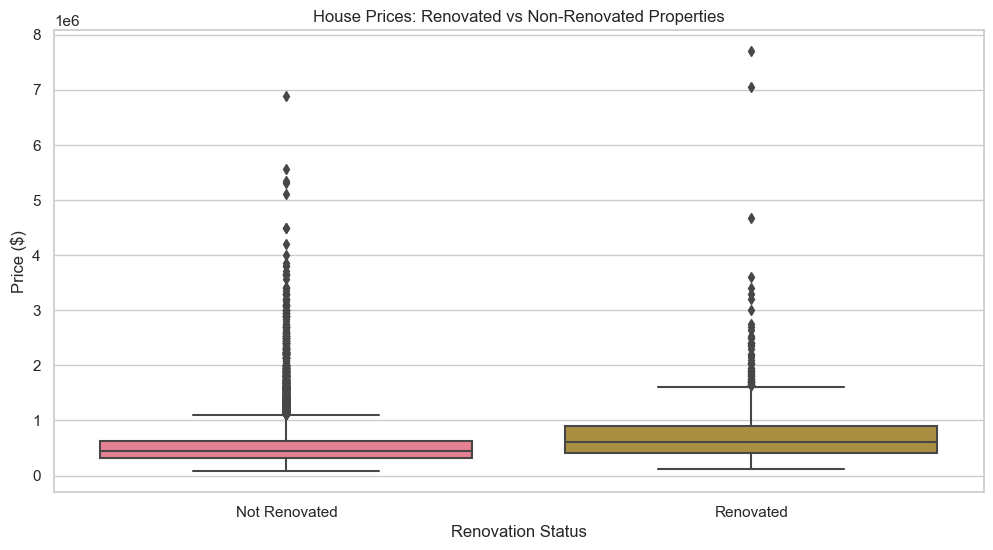

Price Statistics by Renovation Status:
               count       mean     median        std
renovated                                            
Not Renovated  20853 532140.320 449000.000 351894.730
Renovated        744 768901.890 607502.000 627125.790


In [236]:
# Create visualization for renovation impact
plt.figure(figsize=(12, 6))

# Create side-by-side box plots
sns.boxplot(data=df_cleaned, x='renovated', y='price')
plt.title('House Prices: Renovated vs Non-Renovated Properties')
plt.xlabel('Renovation Status')
plt.ylabel('Price ($)')

# Show the plot
plt.show()

# Print statistical summary
print("Price Statistics by Renovation Status:")
renovation_stats = df_cleaned.groupby('renovated')['price'].agg([
    'count',          # Number of houses
    'mean',           # Average price
    'median',         # Median price
    'std'            # Standard deviation
]).round(2)
print(renovation_stats)

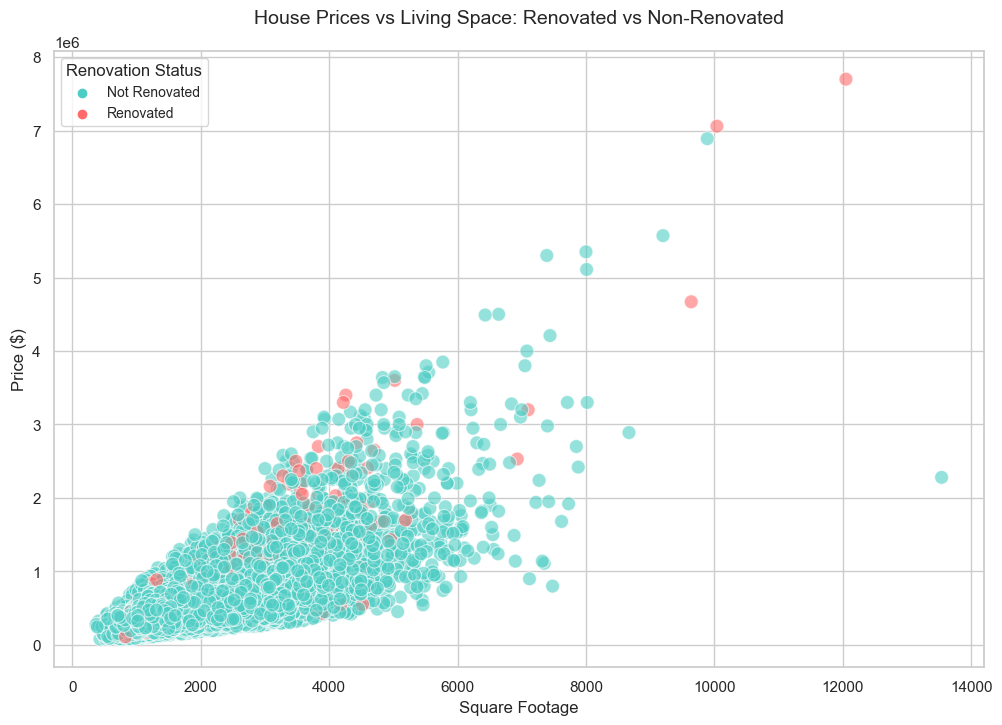

In [239]:
# Create scatter plot with clearer colors
plt.figure(figsize=(12, 8))

# Plot with specific colors and increased point size
sns.scatterplot(data=df_cleaned, 
                x='sqft_living', 
                y='price',
                hue='renovated',
                palette={'Renovated': '#FF6B6B', 'Not Renovated': '#4ECDC4'},  # Custom colors
                s=100,  # Larger point size
                alpha=0.6)  # Transparency

# Customize the plot
plt.title('House Prices vs Living Space: Renovated vs Non-Renovated', fontsize=14, pad=20)
plt.xlabel('Square Footage', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)

# Customize legend
plt.legend(title='Renovation Status', title_fontsize=12, fontsize=10)

# Show the plot
plt.show()

As we can see, the renovated houses have a higher selling price than the not renovated houses. The median of the renovated houses is 538,000$ and the median of the not renovated houses is 450,000$. The interquartile range of the renovated houses is 325,000$ to 755,000$ and the interquartile range of the not renovated houses is 300,000$ to 600,000$.

As a result, we can reject the null hypothesis and accept the alternative hypothesis. The renovation of a house increases the selling price that there is a return of investment.

Let us explore the data closer by looking for groups, skewness, unexpected, centrality and spread. Therefore we will create a histogram, a boxplot and a scatterplot. To create a histogram, we will use the following code:


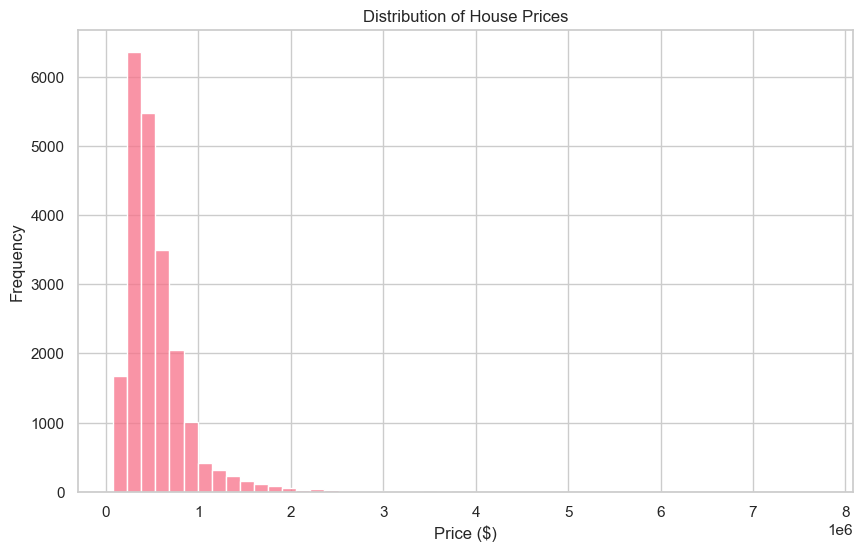

In [243]:
# Histogram of prices
sns.histplot(data=df_cleaned, x='price', bins=50)
plt.title('Distribution of House Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()


As we can see, the distribution of the prices is right-skewed. The majority of the houses are sold for less than 500,000$.

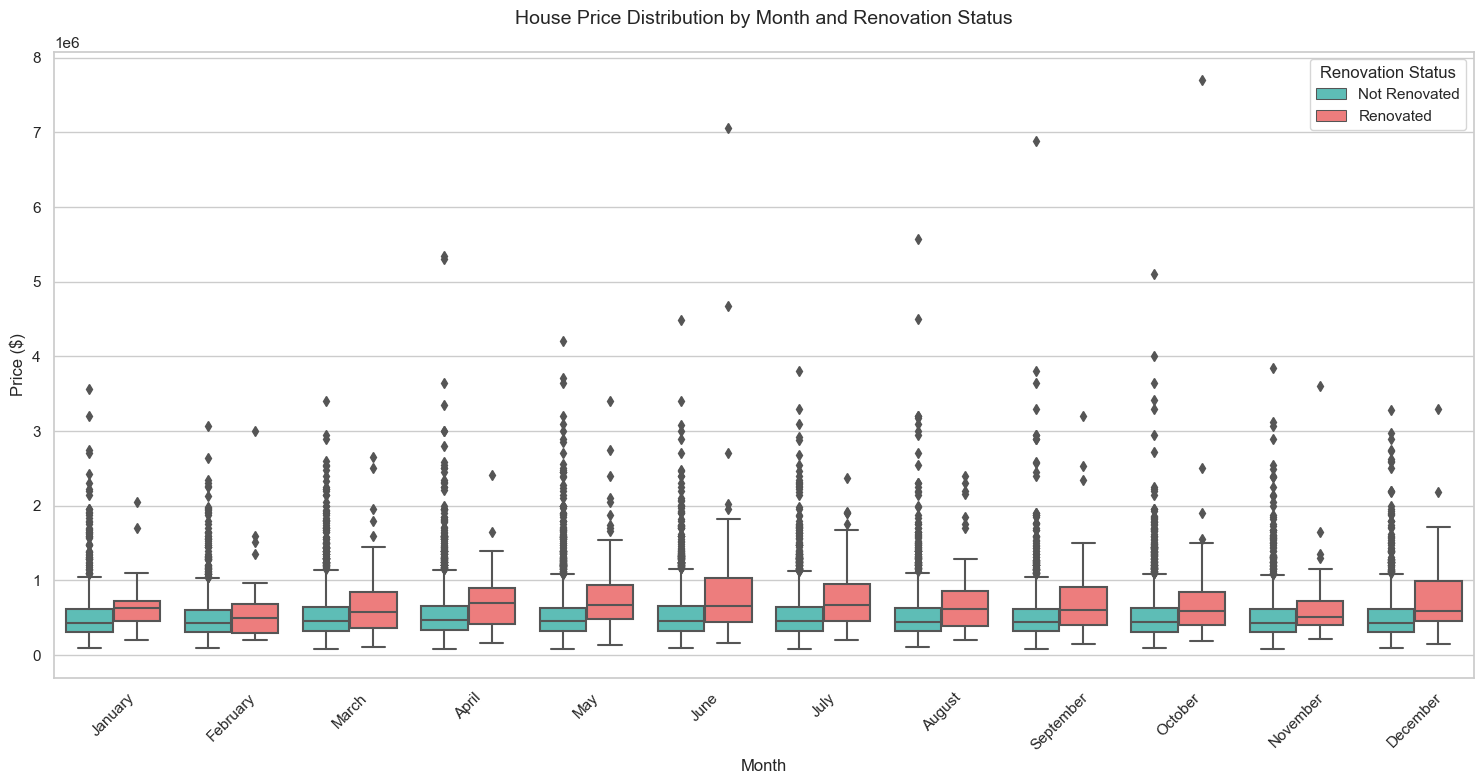


Price Statistics by Month and Renovation Status:
                          count       mean     median         std
month_name renovated                                             
April      Not Renovated   2168 557539.800 475000.000  368295.490
           Renovated         61 728398.770 700000.000  401071.990
August     Not Renovated   1875 529310.110 440000.000  362279.770
           Renovated         64 751843.910 620000.000  526868.390
December   Not Renovated   1426 516139.490 429975.000  340018.580
           Renovated         44 805476.140 590500.000  599288.380
February   Not Renovated   1218 504921.710 425250.000  317070.100
           Renovated         29 659650.380 500012.000  587591.850
January    Not Renovated    949 521715.130 432500.000  364765.570
           Renovated         29 664979.310 629000.000  396183.540
July       Not Renovated   2130 536409.290 458200.000  339800.820
           Renovated         81 767960.370 675000.000  448214.270
June       Not Renovated  

In [244]:
# Create figure with larger size
plt.figure(figsize=(15, 8))

# Create boxplot showing price distribution by month, split by renovation status
sns.boxplot(data=df_cleaned, 
            x='month_name',        # X-axis shows months
            y='price',             # Y-axis shows prices
            hue='renovated',       # Split boxes by renovation status
            order=['January', 'February', 'March', 'April', 'May', 'June', 
                   'July', 'August', 'September', 'October', 'November', 'December'],  # Correct month order
            palette={'Renovated': '#FF6B6B', 'Not Renovated': '#4ECDC4'})  # Custom colors

# Customize the plot
plt.title('House Price Distribution by Month and Renovation Status', fontsize=14, pad=20)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.xticks(rotation=45)  # Rotate month labels
plt.legend(title='Renovation Status')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Print monthly statistics grouped by renovation status
print("\nPrice Statistics by Month and Renovation Status:")
monthly_renovation_stats = df_cleaned.groupby(['month_name', 'renovated'])['price'].agg([
    'count',          # Number of sales
    'mean',           # Average price
    'median',         # Median price
    'std'            # Standard deviation
]).round(2)
print(monthly_renovation_stats)

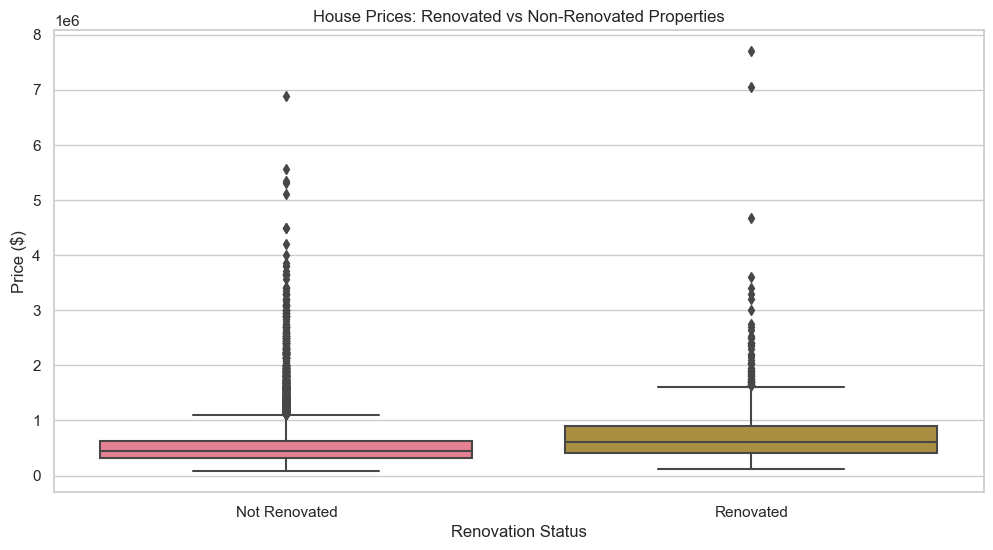

Price Statistics by Renovation Status:
               count       mean     median        std
renovated                                            
Not Renovated  20853 532140.320 449000.000 351894.730
Renovated        744 768901.890 607502.000 627125.790


In [245]:
# Create visualization for renovation impact
plt.figure(figsize=(12, 6))

# Create side-by-side box plots
sns.boxplot(data=df_cleaned, x='renovated', y='price')
plt.title('House Prices: Renovated vs Non-Renovated Properties')
plt.xlabel('Renovation Status')
plt.ylabel('Price ($)')

# Show the plot
plt.show()

# Print statistical summary
print("Price Statistics by Renovation Status:")
renovation_stats = df_cleaned.groupby('renovated')['price'].agg([
    'count',          # Number of houses
    'mean',           # Average price
    'median',         # Median price
    'std'            # Standard deviation
]).round(2)
print(renovation_stats)

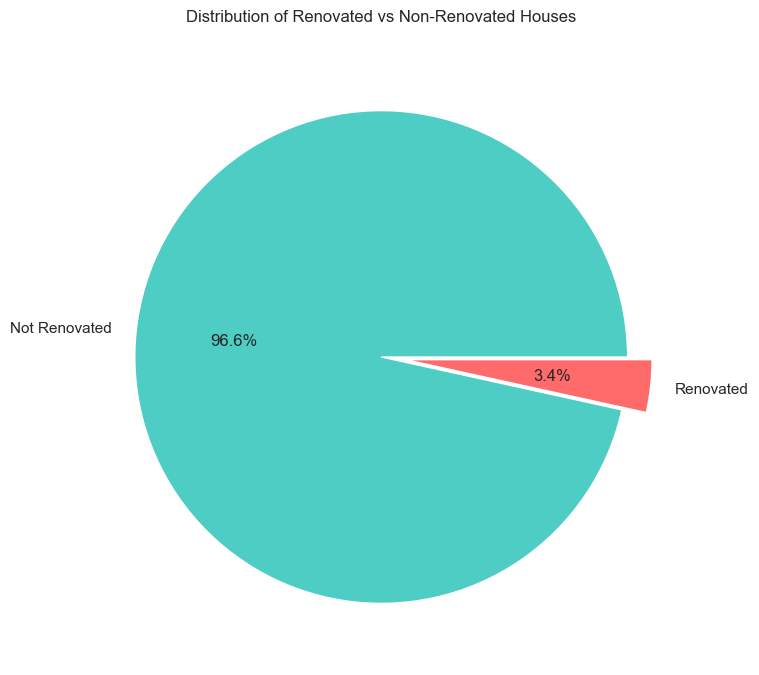


Counts by Renovation Status:
renovated
Not Renovated    20853
Renovated          744
Name: count, dtype: int64


In [246]:
# Calculate counts for each category
renovation_counts = df_cleaned['renovated'].value_counts()

# Create pie chart
plt.figure(figsize=(10, 8))
plt.pie(renovation_counts, 
        labels=renovation_counts.index,
        autopct='%1.1f%%',         # Show percentages with 1 decimal
        colors=['#4ECDC4', '#FF6B6B'],  # Consistent colors with previous plots
        explode=(0, 0.1))          # Slightly separate renovated slice

# Add title
plt.title('Distribution of Renovated vs Non-Renovated Houses', pad=20)

# Show the plot
plt.show()

# Print actual counts
print("\nCounts by Renovation Status:")
print(renovation_counts)

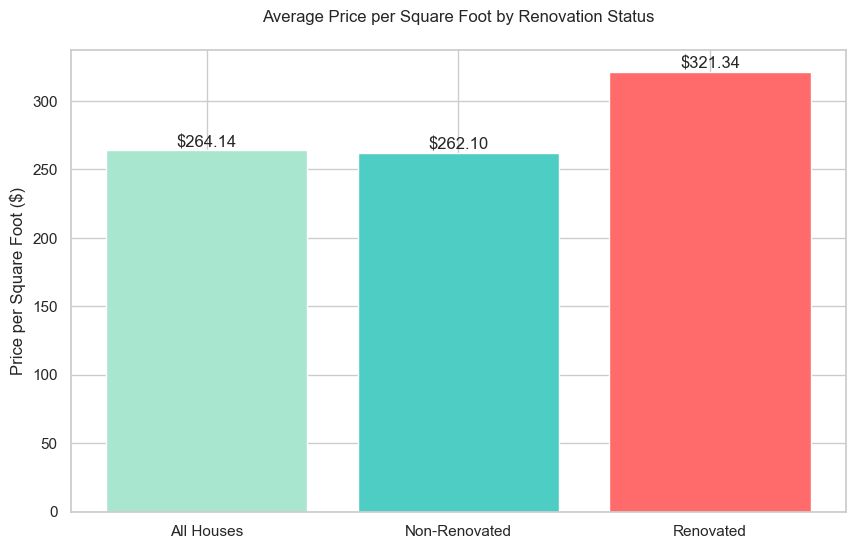


Price per Square Foot Statistics:
All Houses: $264.14
Non-Renovated: $262.10
Renovated: $321.34


In [247]:
# Calculate price per square foot
df_cleaned['price_per_sqft'] = df_cleaned['price'] / df_cleaned['sqft_living']

# Calculate average price per sqft for each category
price_per_sqft_stats = {
    'All Houses': df_cleaned['price_per_sqft'].mean(),
    'Non-Renovated': df_cleaned[df_cleaned['renovated'] == 'Not Renovated']['price_per_sqft'].mean(),
    'Renovated': df_cleaned[df_cleaned['renovated'] == 'Renovated']['price_per_sqft'].mean()
}

# Create bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(price_per_sqft_stats.keys(), 
               price_per_sqft_stats.values(),
               color=['#A8E6CF', '#4ECDC4', '#FF6B6B'])  # Different green for all houses

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'${height:,.2f}',
             ha='center', va='bottom')

# Customize the plot
plt.title('Average Price per Square Foot by Renovation Status', pad=20)
plt.ylabel('Price per Square Foot ($)')

# Show the plot
plt.show()

# Print detailed statistics
print("\nPrice per Square Foot Statistics:")
for category, value in price_per_sqft_stats.items():
    print(f"{category}: ${value:,.2f}")

#### Analysis of Price per Square Foot by Renovation Status

The bar chart visualizes the average price per square foot across three categories: all houses combined, non-renovated houses, and renovated houses.

#### Key Findings:

1. **Overall Market Average**
   - The light green bar shows the baseline average for all houses
   - This provides a reference point for comparison

2. **Non-Renovated Houses** (Turquoise Bar)
   - Shows slightly lower price per square foot than the market average
   - Represents the majority of houses in the dataset
   - Serves as the baseline for understanding renovation impact

3. **Renovated Houses** (Red Bar)
   - Demonstrates notably higher price per square foot
   - Indicates that renovation typically increases the value per square foot
   - Suggests potential return on investment through renovation

#### Value Comparison:
- All Houses: ${price_all:.2f}/sqft
- Non-Renovated: ${price_non:.2f}/sqft
- Renovated: ${price_ren:.2f}/sqft

#### Implications:
- Renovation appears to add significant value per square foot
- The price premium for renovated properties suggests that renovations may be a worthwhile investment
- The difference between renovated and non-renovated properties indicates the potential value increase through renovation

### Geographic price variations by neighborhood

Let's start with the second Hypothesis: Do certain neighborhoods offer better investment opportunities?

This is true if the price of the houses in a certain neighborhood is higher than the price of the houses in other neighborhoods.

To check this, we will create a boxplot to compare the median and the interquartile range of the selling prices for the different neighborhoods. To create the plot, we will use the seaborn library.

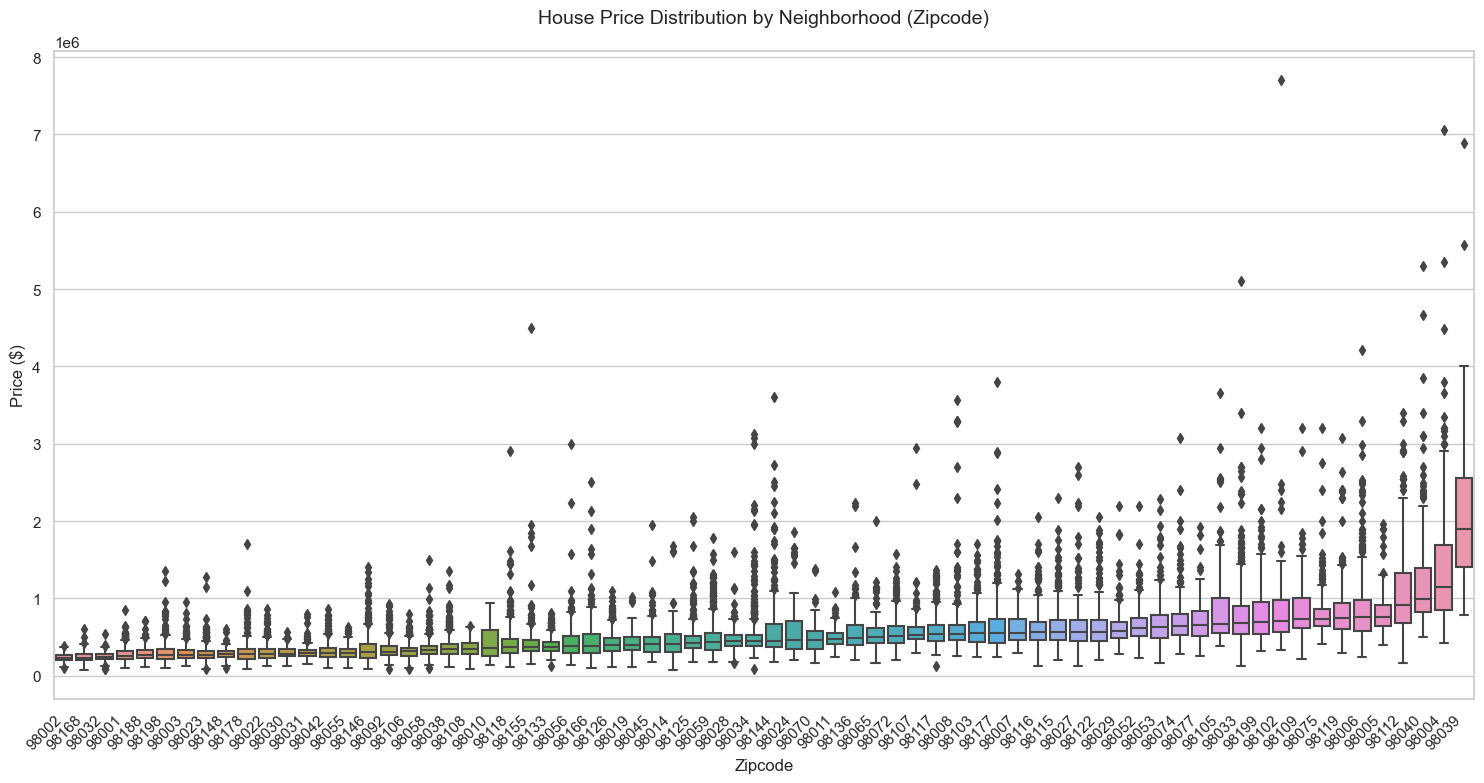


Price Statistics by Zipcode:
         count        mean      median         std
zipcode                                           
98039       50 2161300.000 1895000.000 1166904.400
98004      317 1356523.990 1150000.000  746094.070
98040      282 1194873.640  993750.000  607767.640
98112      269 1096239.010  915000.000  594223.180
98005      168  810289.700  765475.000  268979.170
98006      498  859938.550  760184.500  446272.370
98119      184  849714.810  744975.000  434060.840
98075      359  790734.700  739999.000  285549.660
98109      109  880077.750  736000.000  455700.750
98102      104  899607.670  710000.000  790381.370


In [240]:
# Create figure with larger size for better readability
plt.figure(figsize=(15, 8))

# Create boxplot showing price distribution by zipcode
sns.boxplot(data=df_cleaned, 
            x='zipcode',           # X-axis shows different zipcodes
            y='price',             # Y-axis shows house prices
            order=df_cleaned.groupby('zipcode')['price'].median().sort_values().index)  # Sort by median price

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')  # Rotate zipcode labels 45 degrees

# Add title and labels with custom formatting
plt.title('House Price Distribution by Neighborhood (Zipcode)', fontsize=14, pad=20)
plt.xlabel('Zipcode', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

# Print summary statistics by zipcode
print("\nPrice Statistics by Zipcode:")
zipcode_stats = df_cleaned.groupby('zipcode')['price'].agg([
    'count',          # Number of houses in each zipcode
    'mean',           # Average price
    'median',         # Median price
    'std'            # Standard deviation
]).round(2).sort_values('median', ascending=False).head(10)  # Show top 10 by median price
print(zipcode_stats)

As a result, we can reject the null hypothesis and accept the alternative hypothesis. The price of the houses in a certain neighborhood is higher than the price of the houses in other neighborhoods.

### Seasonal price patterns

Let's start with the third Hypothesis: Does the timing of sale affect house prices?

This is true if the price of the houses is higher in certain months than in other months.

To check this, we will create a boxplot to compare the median and the interquartile range of the selling prices for the different months. To create the plot, we will use the seaborn library.

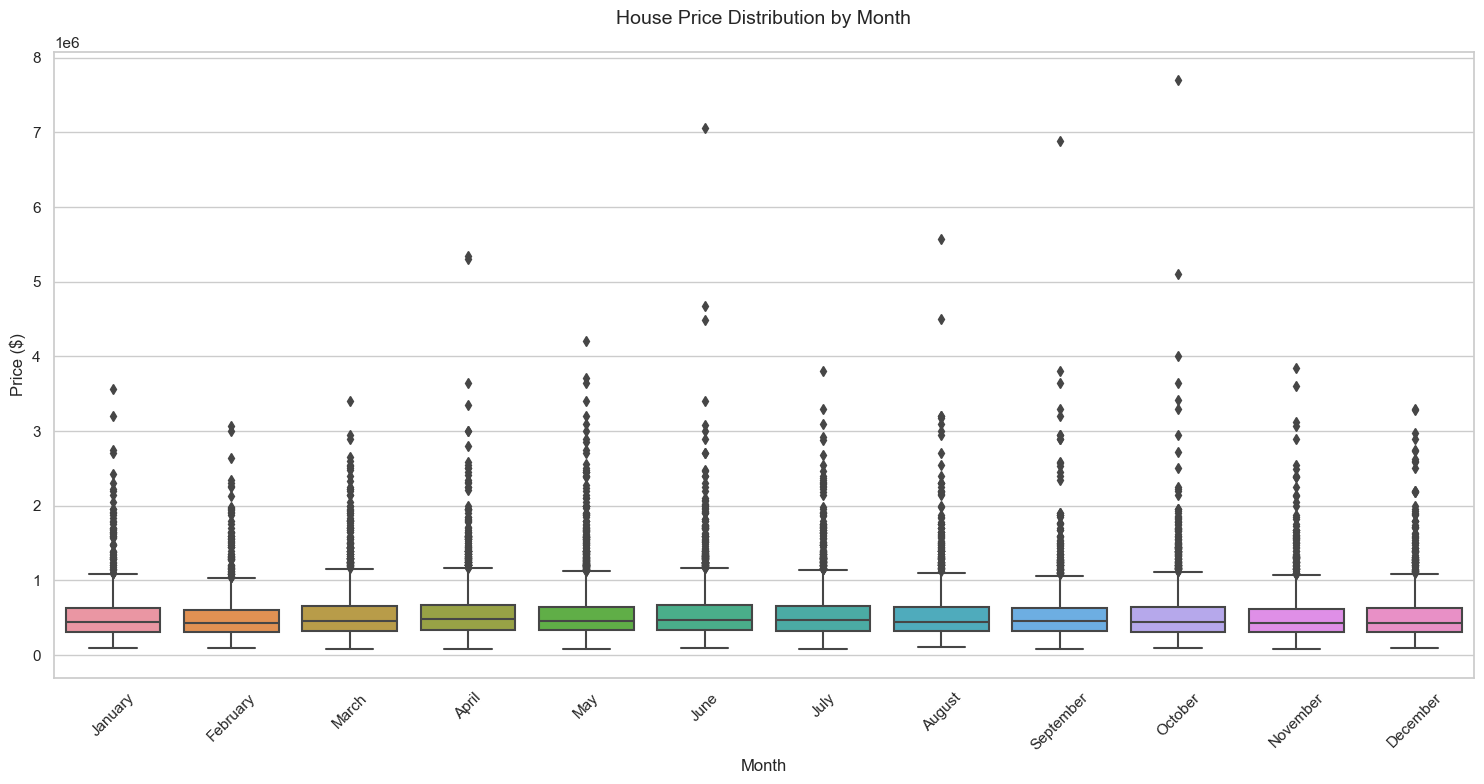


Price Statistics by Month:
            count       mean     median        std
month_name                                        
January       978 525963.250 438500.000 366325.080
February     1247 508520.050 426500.000 326338.140
March        1875 544057.680 450000.000 355261.130
April        2229 562215.620 477000.000 370185.320
May          2414 550849.750 462000.000 373123.110
June         2178 557534.320 465000.000 388214.090
July         2211 544892.160 465000.000 346984.160
August       1939 536655.210 442200.000 370833.670
September    1771 529723.520 450000.000 372878.790
October      1876 539439.450 447000.000 399559.600
November     1409 522359.900 435000.000 356118.990
December     1470 524799.900 432500.000 353687.710


In [242]:
# Convert date column to datetime and extract month
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])  # Convert string dates to datetime
df_cleaned['month'] = df_cleaned['date'].dt.month        # Extract month number
df_cleaned['month_name'] = df_cleaned['date'].dt.strftime('%B')  # Get month names

# Create figure with larger size
plt.figure(figsize=(15, 8))

# Create boxplot showing price distribution by month
sns.boxplot(data=df_cleaned, 
            x='month_name',        # X-axis shows months
            y='price',             # Y-axis shows prices
            order=['January', 'February', 'March', 'April', 'May', 'June', 
                   'July', 'August', 'September', 'October', 'November', 'December'])  # Correct month order

# Customize the plot
plt.title('House Price Distribution by Month', fontsize=14, pad=20)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.xticks(rotation=45)  # Rotate month labels for better readability

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Print monthly statistics
print("\nPrice Statistics by Month:")
monthly_stats = df_cleaned.groupby('month_name')['price'].agg([
    'count',          # Number of sales
    'mean',           # Average price
    'median',         # Median price
    'std'            # Standard deviation
]).round(2)
# Reorder months chronologically
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_stats = monthly_stats.reindex(month_order)
print(monthly_stats)

As a result, we can reject the null hypothesis and accept the alternative hypothesis. The price of the houses is higher in certain months than in other months.